In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,NaN,1.0,NaN,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,NaN,3.0,2.0,1.0
2,3.0,1.0,1.0,NaN,2.0,NaN,NaN,1.0,1.0
3,6.0,NaN,8.0,NaN,3.0,4.0,3.0,NaN,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,NaN,1.0,1.0,1.0,2.0,1.0,2.0,1.0,NaN
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,NaN,4.0,NaN,NaN,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,NaN,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	136
float64		column 2	165
float64		column 3	103
float64		column 4	198
float64		column 5	66
float64		column 6	132
float64		column 7	169
float64		column 8	132
float64		column 9	103


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,547.000000,518.000000,580.000000,485.000000,617.000000,551.000000,514.000000,551.000000,580.000000
mean,4.457038,2.909266,3.184483,2.519588,3.183144,3.313975,3.239300,2.644283,1.553448
std,2.677316,2.799812,2.914812,2.566095,2.151828,3.471097,2.259727,2.859205,1.649485
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

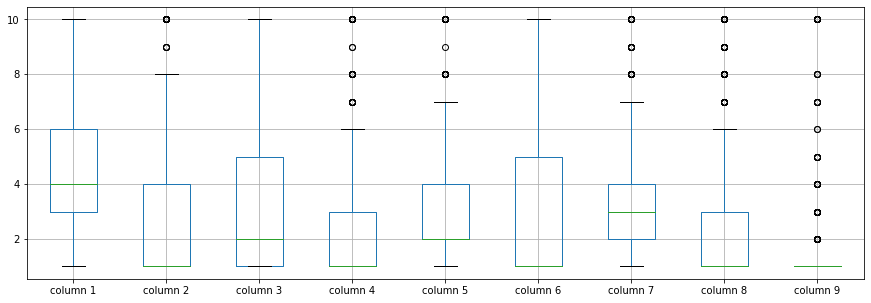

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.457038
column 2    2.909266
column 3    3.184483
column 4    2.519588
column 5    3.183144
column 6    3.313975
column 7    3.239300
column 8    2.644283
column 9    1.553448
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.588721,0.656682,0.441854,0.523827,0.563938,0.513184,0.494185,0.355259
column 2,0.588721,1.000000,0.858929,0.694065,0.739196,0.655719,0.684713,0.659802,0.407393
column 3,0.656682,0.858929,1.000000,0.570527,0.706298,0.672972,0.679304,0.708100,0.438809
column 4,0.441854,0.694065,0.570527,1.000000,0.574347,0.605559,0.583265,0.531689,0.363950
column 5,0.523827,0.739196,0.706298,0.574347,1.000000,0.536635,0.562700,0.603740,0.506969
column 6,0.563938,0.655719,0.672972,0.605559,0.536635,1.000000,0.632693,0.574155,0.368914
column 7,0.513184,0.684713,0.679304,0.583265,0.562700,0.632693,1.000000,0.587982,0.329856
column 8,0.494185,0.659802,0.708100,0.531689,0.603740,0.574155,0.587982,1.000000,0.472671
column 9,0.355259,0.407393,0.438809,0.363950,0.506969,0.368914,0.329856,0.472671,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+88,9+88+88,9+88+88,9+88+88+88+88,9+88+88+88+88+88,9+88+88+88+88+88+88,9+88+88+88+88+88,9+88+88+88+88,9+88+88+88,9+88+88,9+88,9], vae_layer = False, seed = 880)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.87155255817232
Epoch: 1 , loss: 27.156442823864165
Epoch: 2 , loss: 24.25043246859596
Epoch: 3 , loss: 23.64077413649786
Epoch: 4 , loss: 23.051479748317174
Epoch: 5 , loss: 22.70705895196824
Epoch: 6 , loss: 22.7142812865121
Epoch: 7 , loss: 22.44264922823225
Epoch: 8 , loss: 22.497841653369722
Epoch: 9 , loss: 22.424811363220215
Epoch: 10 , loss: 22.11846147264753
Epoch: 11 , loss: 21.88993483497983
Epoch: 12 , loss: 21.849092483520508
Epoch: 13 , loss: 21.678101721264067
Epoch: 14 , loss: 21.196685768309095
Epoch: 15 , loss: 21.550582545144216
Epoch: 16 , loss: 21.17844499860491
Epoch: 17 , loss: 20.692735104333785
Epoch: 18 , loss: 20.91958983739217
Epoch: 19 , loss: 20.495488053276425
Epoch: 20 , loss: 20.758172671000164
Epoch: 21 , loss: 20.511563119434175
Epoch: 22 , loss: 20.369018963405065
Epoch: 23 , loss: 20.537573882511683
Epoch: 24 , loss: 20.74860127766927
Epoch: 25 , loss: 20.512930642

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    1.000000
column 4    1.000000
column 5    2.000000
column 6    2.950004
column 7    2.000000
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,-2.661968,0.000000,0.671007,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,-7.927450,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.220029,0.0,-0.342411,-1.345283,0.000000,0.000000
3,0.000000,-5.989467,0.000000,0.521002,0.0,0.000000,0.000000,-5.296181,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.535011,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,-1.631056,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.490372
679,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
680,0.000000,0.000000,0.000000,-8.027326,0.0,-7.183555,-2.108318,0.000000,0.000000
681,0.000000,0.000000,0.000000,0.000000,0.0,2.493495,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(131.9363682070317, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.3934544401971344

In [18]:
new_df.iloc[66,:]

column 1    3.051009
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.000000
column 7    7.000000
column 8    2.000000
column 9    1.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,2.338032,1.000000,1.671007,1.000000,2.0,1.000000,3.000000,1.000000,1.000000
1,5.000000,4.000000,4.000000,5.000000,7.0,2.072550,3.000000,2.000000,1.000000
2,3.000000,1.000000,1.000000,1.220029,2.0,1.657589,1.654717,1.000000,1.000000
3,6.000000,2.010533,8.000000,1.521002,3.0,4.000000,3.000000,1.703819,1.000000
4,4.000000,1.000000,1.000000,3.000000,2.0,1.000000,1.464989,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
678,1.368944,1.000000,1.000000,1.000000,2.0,1.000000,2.000000,1.000000,0.509628
679,2.000000,1.000000,1.000000,1.000000,2.0,1.000000,3.000000,1.000000,1.000000
680,5.000000,10.000000,10.000000,1.972674,4.0,2.816445,2.891682,6.000000,3.000000
681,1.000000,1.000000,1.000000,3.000000,2.0,3.493495,1.000000,1.000000,1.000000


In [20]:
imputations[-1].to_excel("BCW_NL_20(imp).xlsx", index=False, header=False)